## Part A
Attribute details for the dataset <br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
12 - quality (score between 0 and 10, based on sensory data)

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

import pandas as pd

In [3]:
#white wine dataset
white_wine_pd = pd.read_csv("./winequality-white.csv",sep=";")
white_wine_pd['is_red'] = 0
white_wine_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
#red wine dataset
red_wine_pd = pd.read_csv("./winequality-red.csv",sep=";")
red_wine_pd["is_red"] = 1
red_wine_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Q. Are there any missing values
Plotting null values of the combined dataset for review.
No missing values in the dataset

In [5]:
#merging data set for overall analysis
wine_df = pd.concat([white_wine_pd,red_wine_pd])

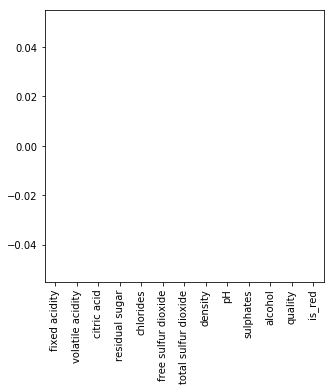

In [5]:
plt.rcParams['figure.figsize'] = (5, 5)
plot_df = wine_df.apply(lambda x: sum(x.isnull()),axis=0).plot.bar()

### Q. Are there inappropraite values?
Check data types of each column. 
All are appropriate as numbers(float and integer)
Also the summary stastics show the minimum value for all columns is non-negative as expected

In [6]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_red                    int64
dtype: object

### Q.Remove or impute any bad data
Data seems to be valid so no imputation is required 

### Q. How is the data distributed?
Plotting each columns distribution graph
* <b> fixed acidity</b> - normally distributed, mean around 7
* <b> volatile acidity</b>- normally distributed, mean 0.25, but due to excessive outliers, data is positively skewed
* <b> citric acid </b>- normally distributed, few outliers with values greater than mean but the distribution is almost symmetric
* <b> residual sugar </b>- almost normal distribution, most values are close to 0 but some outliers has skewed it positively
* <b> chlorides </b>- normally distributed, some ouliers on right of the mean, most data close to  0
* <b> free sulfur dioxide </b>- normally distributed
* <b> total sulfur dioxide </b>- too many outliers on the left of mean making the distribution negatively skewed
* <b> density </b>- symmetric normal distribution, few outliers present on right of the mean 
* <b> pH </b>- symmetric normal distribution
* <b> sulphates </b>- normally distributed but some outliers extending to right of the mean
* <b> alcohol </b>- exact values were not really well distributed, however, a tan transformation of the data seems 

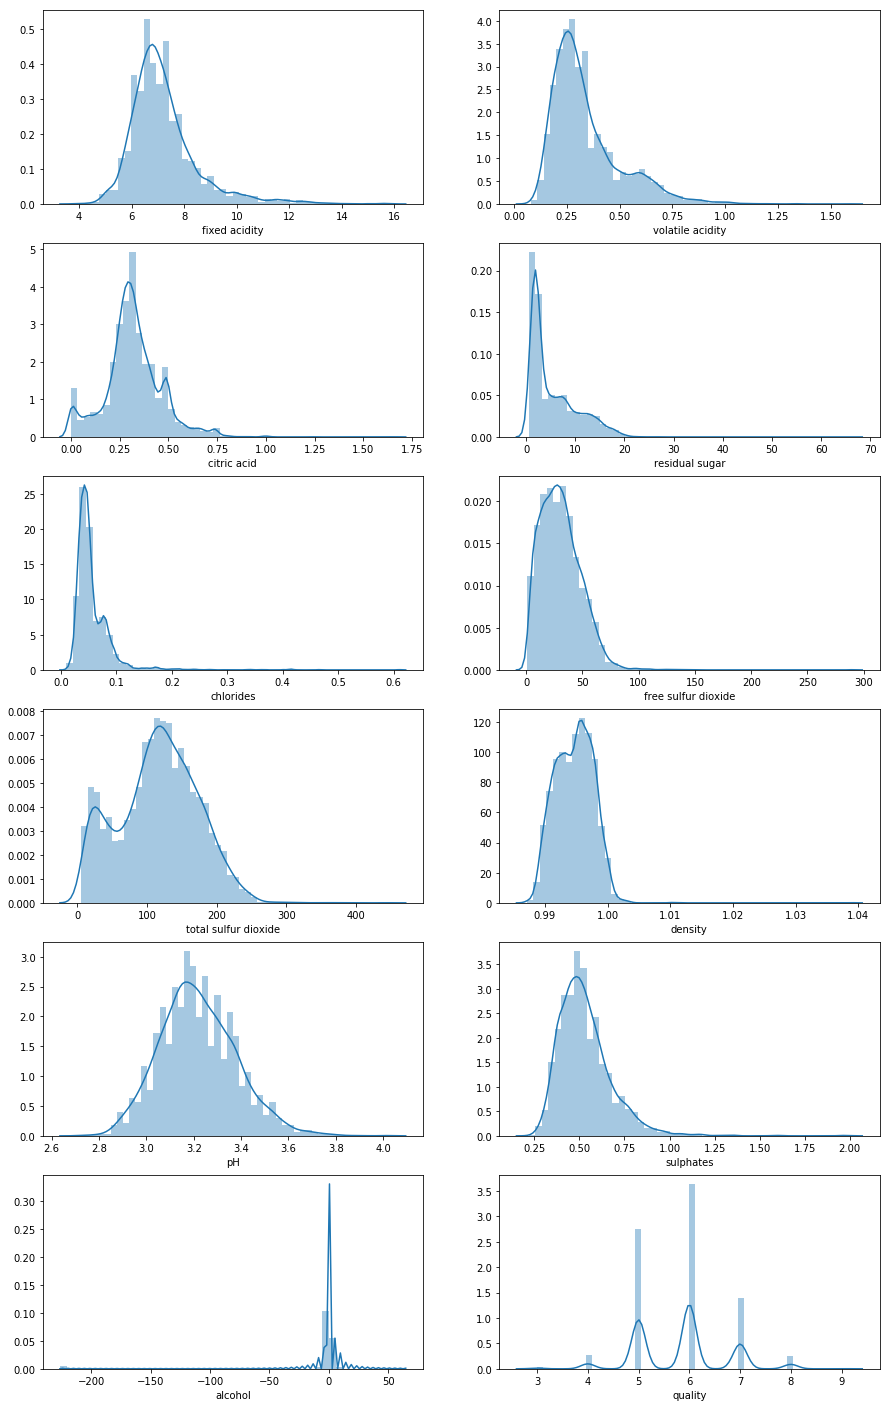

In [6]:
plt.rcParams['figure.figsize'] = (15, 25)
fig, axs = plt.subplots(ncols=2,nrows =6)

sns.distplot(a = wine_df['fixed acidity'], ax = axs[0,0])
sns.distplot(a = wine_df['volatile acidity'],ax = axs[0,1])
sns.distplot(a = wine_df['citric acid'],ax = axs[1,0])
sns.distplot(a = wine_df['residual sugar'],ax = axs[1,1])
sns.distplot(a = wine_df['chlorides'],ax = axs[2,0])
sns.distplot(a = wine_df['free sulfur dioxide'],ax = axs[2,1])
sns.distplot(a = wine_df['total sulfur dioxide'],ax = axs[3,0])
sns.distplot(a = wine_df['density'],ax = axs[3,1])
sns.distplot(a = wine_df['pH'],ax = axs[4,0])
sns.distplot(a = wine_df['sulphates'],ax = axs[4,1])
sns.distplot(a = np.tan(wine_df['alcohol']),ax = axs[5,0])
sns.distplot(a = wine_df['quality'],ax = axs[5,1])
plt.rcParams['figure.figsize'] = (15, 9)

### Q. What are the summary statistics?
Below are the summary stastics

In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Q. Are there any outliers
Plotting graphs for outliers, we see that almost all the columns have some outliers.
However, they cannot be removed or changed as they are actual business values and need to be considered while training our model

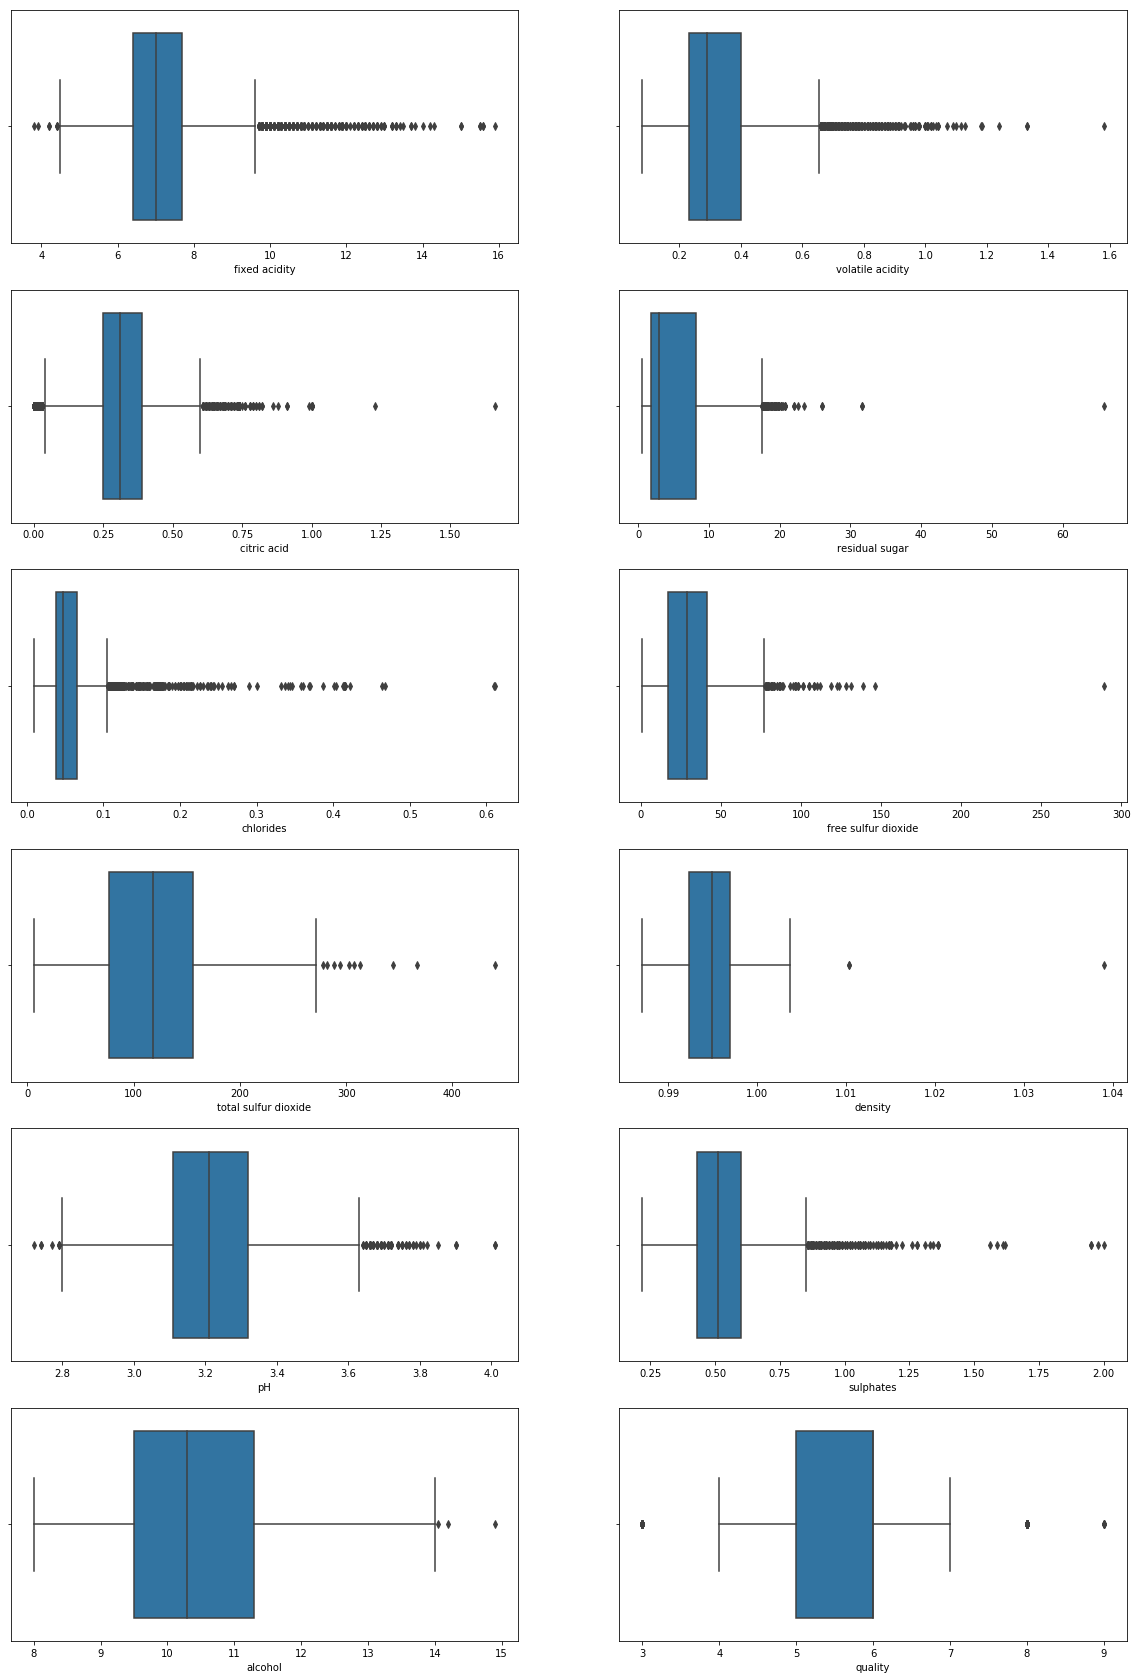

In [25]:
plt.rcParams['figure.figsize'] = (20, 30)
fig, axs = plt.subplots(ncols=2,nrows =6)
#ax = sns.boxplot(x="fixed acidity",data=red_wine_pd,ax=)
sns.boxplot(x = wine_df['fixed acidity'], ax = axs[0,0])
sns.boxplot(x = wine_df['volatile acidity'],ax = axs[0,1])
sns.boxplot(x = wine_df['citric acid'],ax = axs[1,0])
sns.boxplot(x = wine_df['residual sugar'],ax = axs[1,1])
sns.boxplot(x = wine_df['chlorides'],ax = axs[2,0])
sns.boxplot(x = wine_df['free sulfur dioxide'],ax = axs[2,1])
sns.boxplot(x = wine_df['total sulfur dioxide'],ax = axs[3,0])
sns.boxplot(x = wine_df['density'],ax = axs[3,1])
sns.boxplot(x = wine_df['pH'],ax = axs[4,0])
sns.boxplot(x = wine_df['sulphates'],ax = axs[4,1])
sns.boxplot(x = wine_df['alcohol'],ax = axs[5,0])
sns.boxplot(x = wine_df['quality'],ax = axs[5,1])
plt.rcParams['figure.figsize'] = (15, 9)

### Q. Write a summary of what the plot tells you? Plot all columns appropriately

##### Lets consider high quality wines, with quality grading greater than 6

In [10]:
high_quality_df = wine_df[wine_df['quality']>6]
high_quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,0
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,0
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,0
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,0
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.9912,3.17,0.35,11.0,7,0


Mean of all the contents in wines(red + white)

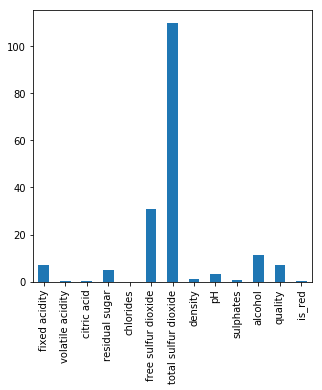

In [11]:
fig, ax = plt.subplots()
high_quality_df.apply(lambda _: sum(_)/len(high_quality_df),axis=0).plot.bar()

In [12]:
plot_wine_df = wine_df
plot_wine_df['Wine'] = plot_wine_df['is_red'].apply(lambda x : 'red' if x==1 else 'white')

##### Plotting high quality wines(ratings>6) and some of their properties 

* <b> Fixed Acidity </b>- Red Wine seems to have higher fixed acidity as compared to white wine, especially wines with quality 5,6 & 7
* <b> Citric Acid </b> - Red Wines have mostly lower citric acid content when high quality wines are considered,however, some have higher content just like most of the white wines. 

* <b> Residual Sugar </b> - Mostly white wines have residual sugar content, red wines, if present have comparatively low residual sugar

* <b> Chlorides </b> - Both, white and red wine contain moderate amount of chloride content.

* <b> Free sulphur dioxide</b> - White wines have higher free sulphur dioxide content and low sulphur dioxide content means higher quality wine as per the graph. Since there are no red wines with quality 9, this interpretation cannot be applied to red wines.


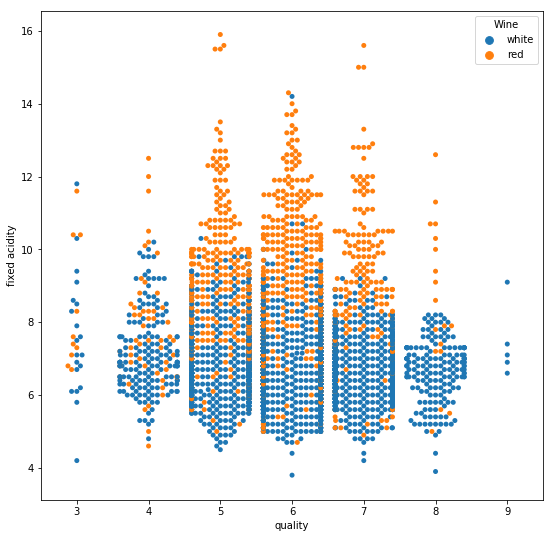

In [80]:
plt.rcParams['figure.figsize'] = (9, 9)
fig, axs = plt.subplots()
sns.swarmplot(x ="quality",y="fixed acidity", data=plot_wine_df,hue="Wine",ax=axs)

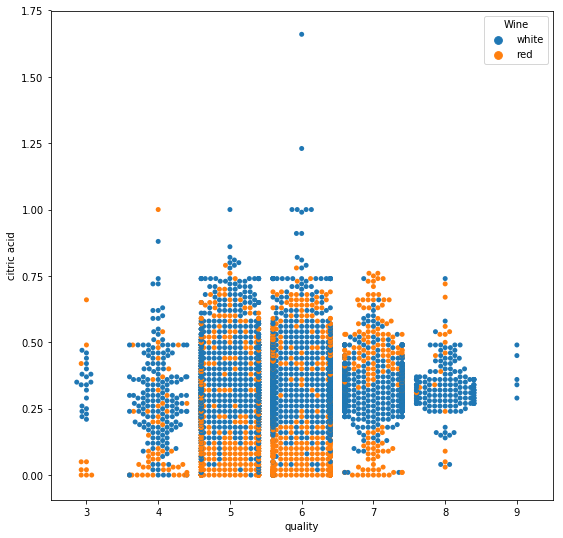

In [81]:
plt.rcParams['figure.figsize'] = (9, 9)
fig, axs = plt.subplots()
sns.swarmplot(x ="quality",y="citric acid", data=plot_wine_df,hue="Wine",ax=axs)

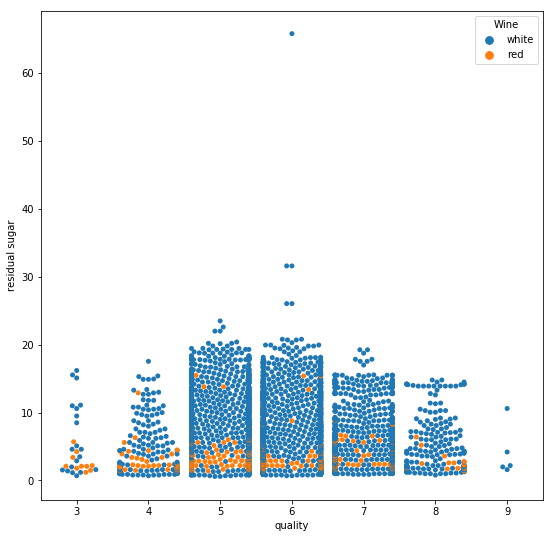

In [82]:
plt.rcParams['figure.figsize'] = (9, 9)
fig, axs = plt.subplots()
sns.swarmplot(x ="quality",y="residual sugar", data=plot_wine_df,hue="Wine",ax=axs)

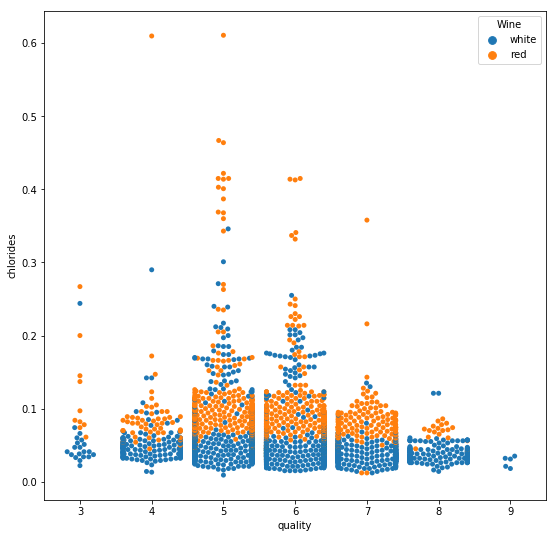

In [83]:
plt.rcParams['figure.figsize'] = (9, 9)
fig, axs = plt.subplots()
sns.swarmplot(x ="quality",y="chlorides", data=plot_wine_df,hue="Wine",ax=axs)

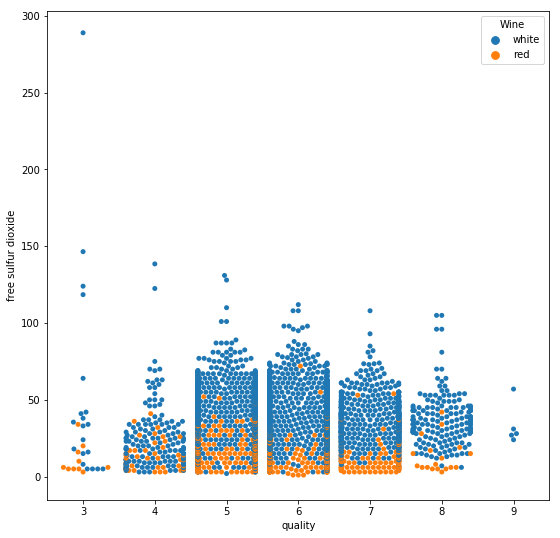

In [84]:
plt.rcParams['figure.figsize'] = (9, 9)
fig, axs = plt.subplots()
sns.swarmplot(x ="quality",y="free sulfur dioxide", data=plot_wine_df,hue="Wine",ax=axs)

### Q. Are any of the columns correlated?
Plotting pair plot for all columsn with hue for red and white wine. Density seems to be independent with all the columns.
The plot also shows possible linear relation between different columns

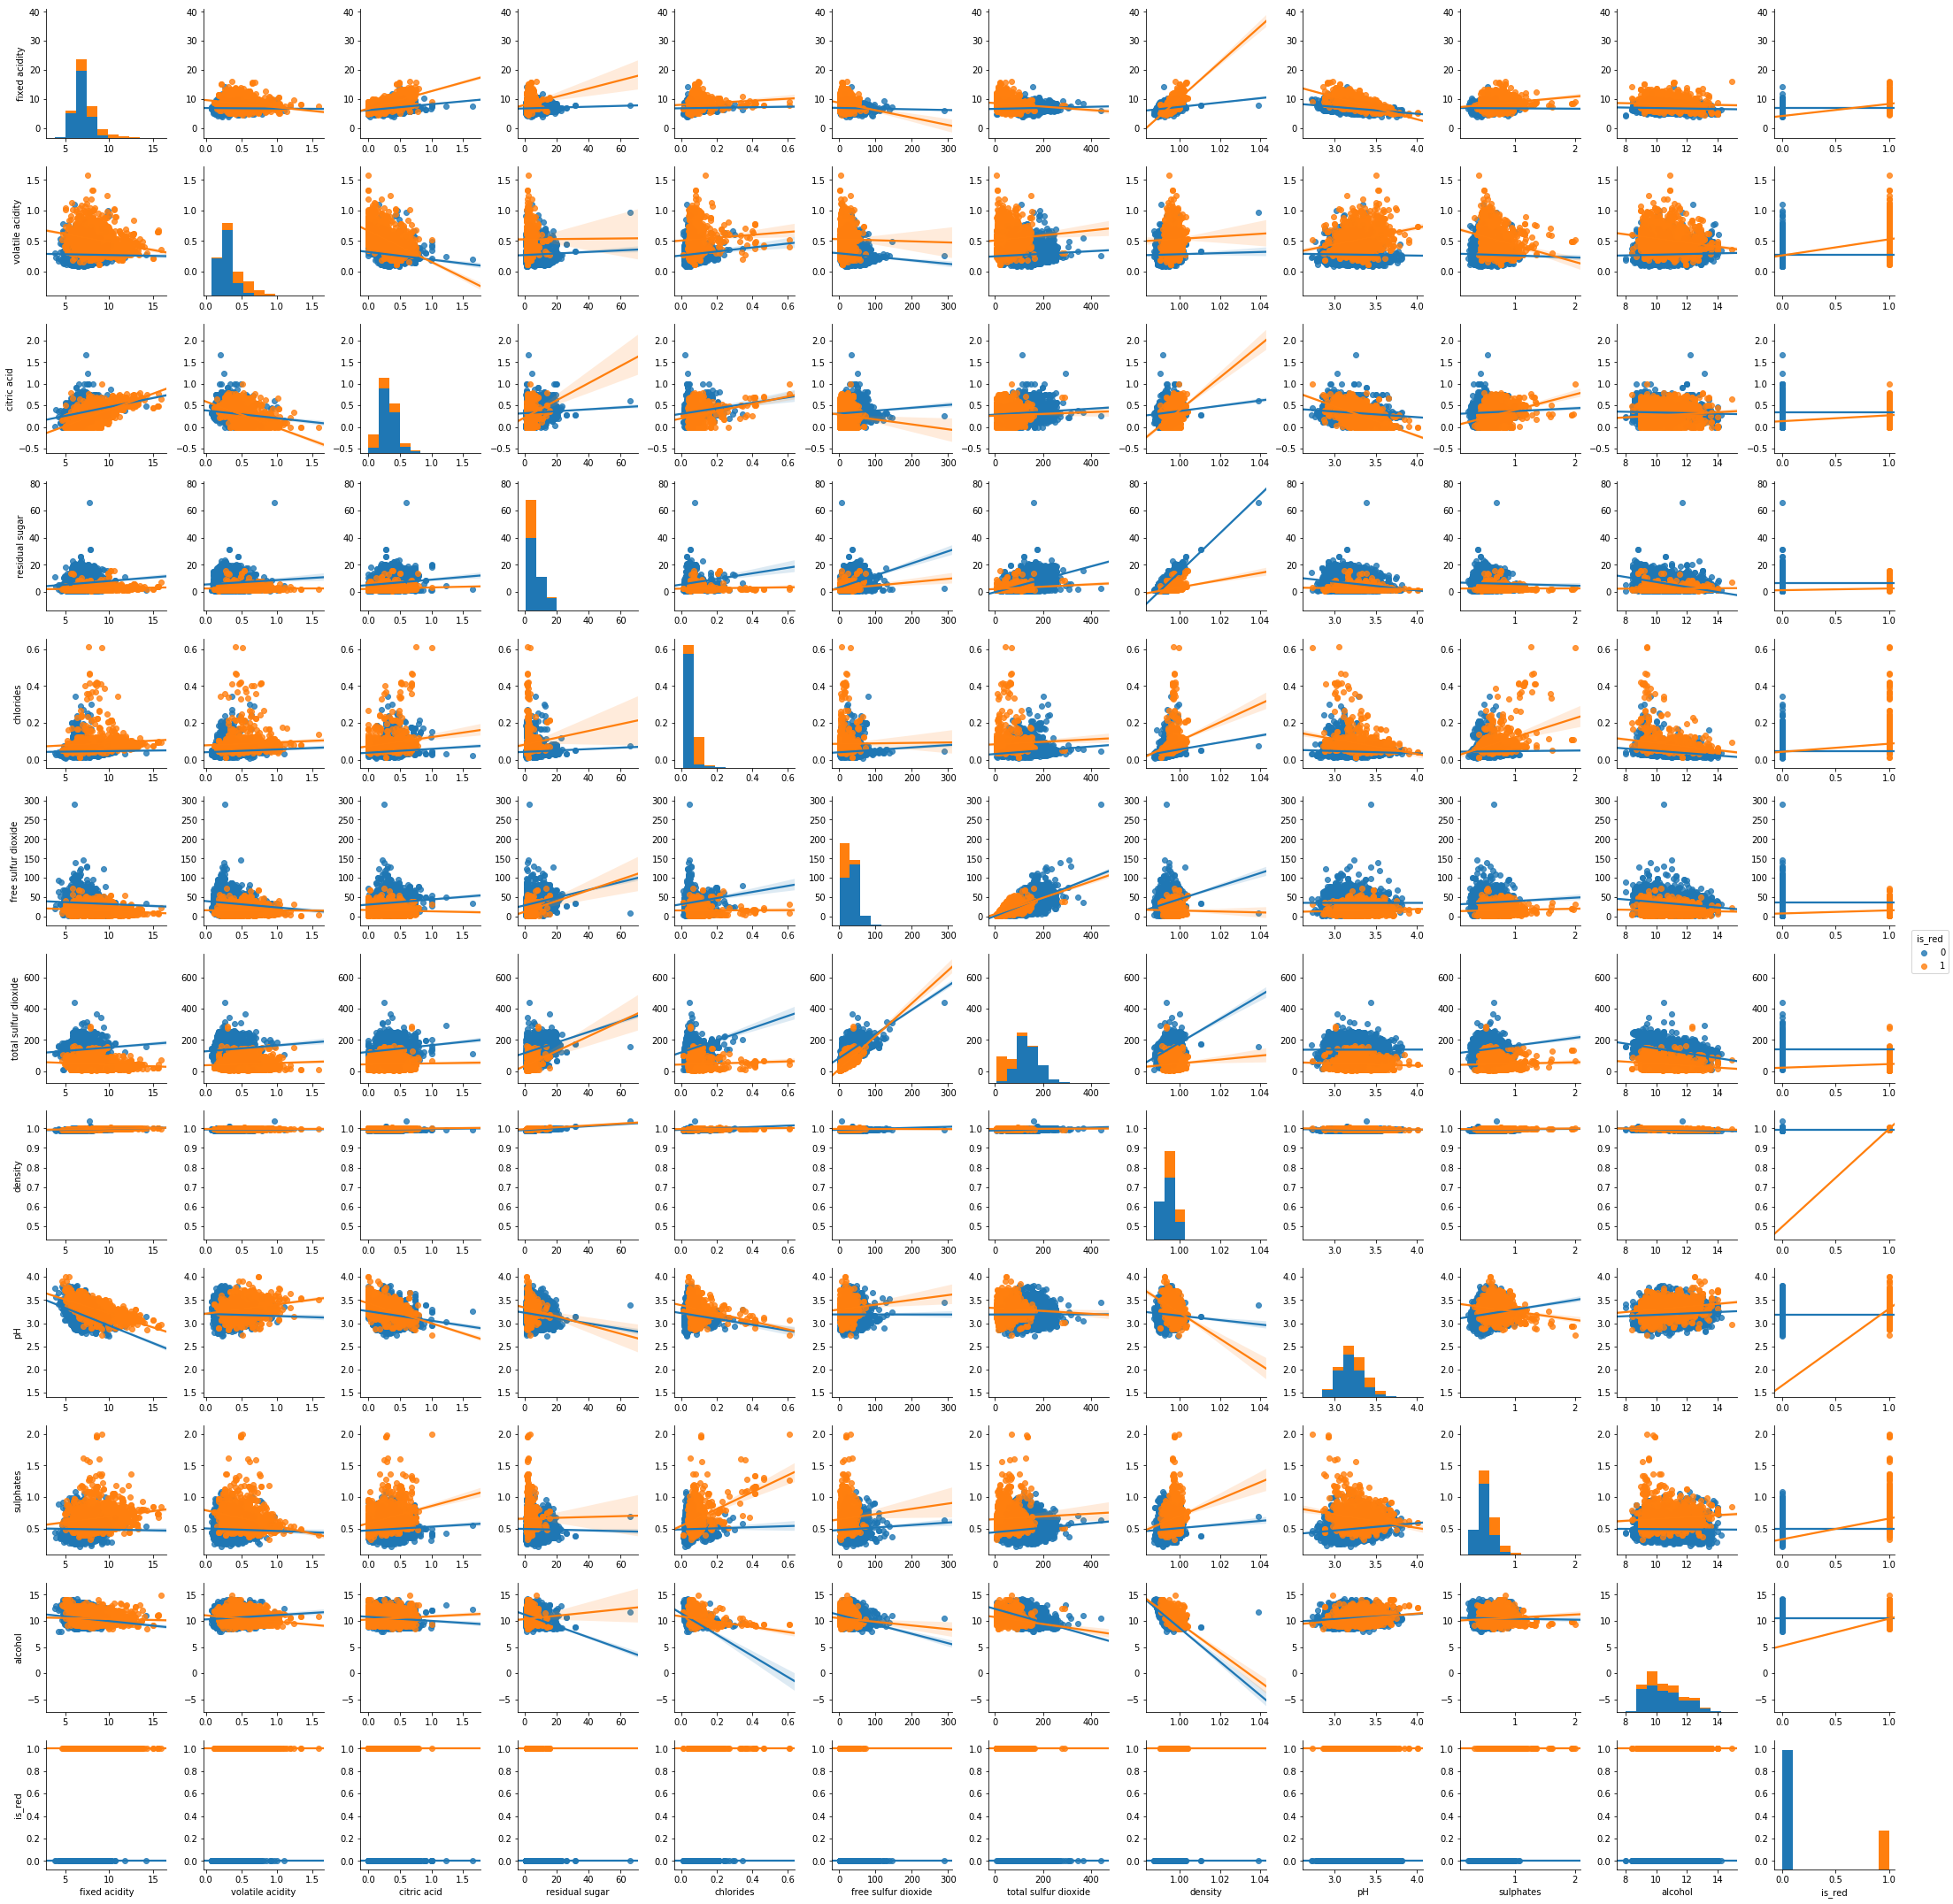

In [20]:
plot_ax = sns.pairplot(wine_df.drop(["quality"],axis=1),kind="reg",hue="is_red",diag_kind = "hist")

Correlation Matrix shows highly correlated columns
1. is_red - volatile acidity
2. is_red - total sulphur dioxide
3. density - alcohol

In [9]:
correlation = wine_df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


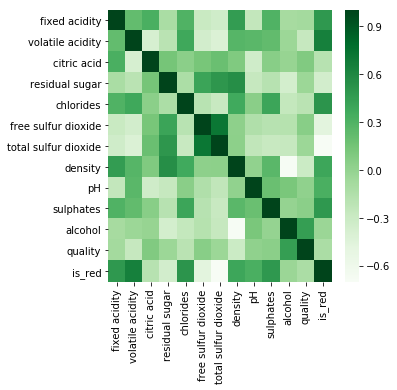

In [11]:
sns.heatmap(correlation,cmap="Greens")

#### Q. Write a clear summary of what the EDA tells you

* We are trying to study the data of white and red with their compositions and how these will effect the quality of the wine. 
* It can be obsereved individual ingredients have affect on the quality of the wine, however not to the both types, for eg:- lower sugar content might make a white wine a good quality but this may not apply for red wine. 
* We need to take into consideation that the wine type in association with each ingredients decide the quality of the wine. 
* The distribution of the contents is not completely uniform but some outliers make the distribution skewed(positive as well as negative) 
* There are different amount of wines in each quality(for eg:- no red wine with quality 9), so it would be inapproriate the quality of a white wine with a quality of red wine and thus each wine should be compared only with its own types.


## Part B Analyze Some Data


<b> Problem Statement :</b> Given some contents of the wine, we will try to predict the type of the wine. However, the quality of the wine in no way is a predictor if the wine is red or white, hence ignoring it in our model is a good idea.

<b>Analysis on background research</b>
* Predicting Wine Quality, Ilker Karakasoglu
https://web.stanford.edu/~ilker/doc/wine_Stats315A.pdf
The published article has detailed Data Exploration and predictions generated by Support Vector Machine(Regression). Three different models were tried, one for white wine, another for red and the third model was fitted for the combined dataset of wines. The individual dataset models scored better than the combined(RMS = 0.71). The color of the wine was not a significant factor for deciding factor for the quality of the wine. Alcohol and Sulphates were the most important factor that decided the quality. 
* https://github.com/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Portugal_Wine_TwoClass_RedWhite_R_KFold/README.md?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3Br6RIXJl2Tv%2BJgakD0OCNfA%3D%3D
This project develops 5 algorithms of machine learning to classify the wines in white or red according to the 11 variables that characterize the wine subject to classification.
The modeling results were similar across all datasets. The same model -Random Forest (RF)- was selected for "df" and "dff" datasets. On the other hand, Support Vector Machine (SVM) model was selected for "dfffull" dataset.

* Analysis of Wine Quality Data https://onlinecourses.science.psu.edu/stat857/node/223:
Classification was done on the quality of the wines(Split into high, medium and low quality).
Random forest with ntree = 150 gave an accuracy of 67.7% as compared to 50% given by simple Tree-based model. However, the results were inconclusive as the model did not show any significant dependency between wine quality and its chemical composition.

<b>Data source</b>

https://archive.ics.uci.edu/ml/datasets/Wine+Qualit 

UCI Machine learning respository:-
Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. 

Original source :http://www3.dsi.uminho.pt/pcortez/wine/




## Model Implementation


<b> Abstract</b>
Red and white wines are distinct due the process involved in their manufacturing. The chemical composition might not be the factor which decides the color of the wine, however, the composition might be the result of the type of the wine in contention. It is, thus, possible to predict if the wine is either red or white using the chemcial composition. We built a deep neural network model that was trained on the chemical  attributes of the wine. The quality of the wine provided was skipped as it is has no contribution and is independent of the wine.

<b>Introduction</b>
We have used the Portugal wine dataset. The dataset is separated into two seperated sets, white wine and red wine.We studied the correlation between all the attributes and observed that each attribute has a relation with the color of the wine.
The dataset used here is unbalanced in a proportion of 75.4% for "White wine" and 24.6% for "Red wine". But our model was able to learn and predict wine type with a high accuracy(99%). 

### Code

In [6]:
#quality is not a factor while determining the type of wine so dropping it
dataset = wine_df.drop("quality", axis=1)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [7]:
# input wine attributes
X = dataset.iloc[:, 0:11].values
# output lables
y = dataset.iloc[:, -1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling
# As the values are present on different scales, we need to scale them so that no single attribute 
# has high/low influence on the response variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [49]:
input_layers = len(X[0])
hidden_layers = int (input_layers/2 +1)

In [33]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = hidden_layers, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layers))

# Adding the second hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [34]:
# Compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
5197/5197 [==============================] - 0s - loss: 0.5857 - acc: 0.9513     
Epoch 2/100
5197/5197 [==============================] - 0s - loss: 0.2864 - acc: 0.9565     
Epoch 3/100
5197/5197 [==============================] - 0s - loss: 0.1528 - acc: 0.9681     
Epoch 4/100
5197/5197 [==============================] - 0s - loss: 0.1037 - acc: 0.9771     
Epoch 5/100
5197/5197 [==============================] - 0s - loss: 0.0797 - acc: 0.9813     
Epoch 6/100
5197/5197 [==============================] - 0s - loss: 0.0656 - acc: 0.9846     
Epoch 7/100
5197/5197 [==============================] - 0s - loss: 0.0563 - acc: 0.9873     
Epoch 8/100
5197/5197 [==============================] - 0s - loss: 0.0495 - acc: 0.9908     
Epoch 9/100
5197/5197 [==============================] - 0s - loss: 0.0445 - acc: 0.9915     
Epoch 10/100
5197/5197 [==============================] - 0s - loss: 0.0406 - acc: 0.9915     
Epoch 11/100
5197/5197 [==============================] - 0

#### Result
Creating confusion matrix for the test data, we get an accuracy of 99%

In [51]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# we consider the probability only if greater than 0.5
y_pred = (y_pred > 0.5)

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[973   2]
 [  4 321]]


In [50]:
#actual accuracy on the test data
accuracy_score(y_test,y_pred)

0.99538461538461542

<b> Discussion</b>:
* We built the deep learning model to predict the color of the wine depending on it's chemical composition.Since the datasets were seperated into two files, we added an extra parameter on the combined dataset to indicate the color of the wine(is_red). Our model was trained to predict this variable, 0 indicating a white wine while 1 being the red wine.Even though the dataset was imbalanced with smaller number of red wines, the model performed well to predict wine (accuracy around 99%).
* We used Keras to implement the model in python for its simiplicity to plug and use hyperparameters. Input was the 11 attributes(quality column was not considered for training). We first tried a two hidden layer model which seemed to perform well. However, it stayed on the accuracy of 94% and showed no improvement over epochs. Single hidden layer had an accuracy of 99% on training data.
* The output of the model was a single neuron showing a probability of a wine being red or white(1=red). Since the probability can lie between 0-1, anything above 0.5 was considered 1(red wine prediction) and anything less 0(white wine prediction)
* The confusion matrix generated on the test data validated the accuracy of the network(99.53%) meaning the model was not overfitting on the train data.

<b> References </b>
* Code Sample : https://www.udemy.com/deeplearning/learn/v4/overview
* Machine Learning :https://github.com/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Portugal_Wine_TwoClass_RedWhite_R_KFold/README.md?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3Br6RIXJl2Tv%2BJgakD0OCNfA%3D%3D
* Predicting Wine Quality, Ilker Karakasoglu
https://web.stanford.edu/~ilker/doc/wine_Stats315A.pdf
* Analysis of Wine Quality Data https://onlinecourses.science.psu.edu/stat857/node/223:

* UCI Machine learning https://archive.ics.uci.edu/ml/datasets/Wine+Quality
* Paulo Cortez, University of Minho, Guimarães, Portugal http://www3.dsi.uminho.pt/pcortez